<a href="https://colab.research.google.com/github/KrushnaChaure/Credit-Card-Default-Prediction/blob/main/Krushna_Chaure_Credit_Card_Default_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Credit Card Default Prediction**

**Project Type** - Classification

**Contribution** - Individual 

# **Problem Statement**

This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the K-S chart to evaluate which customers will default on their credit card payments.

# **Lets Begin & Kick start our journy**

## **1. Know Our Data**

### Import Libraries

In [85]:
# Importing necessary libraries for our project

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as math
import warnings
import seaborn as sns; sns.set()
warnings.filterwarnings('ignore')
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
%matplotlib inline
import xgboost
import datetime as dt
from scipy.stats import *
import math
# Importing Machine Learning Libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
# Importing Evaluation matrics 
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,roc_auc_score,confusion_matrix

### Dataset Loading


In [2]:
# Firstly we mount the drive over this colab notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Here we connecting & importing the dataset over this colab notebook
dataset= pd.read_csv('/content/drive/MyDrive/Almabetter/Module 4/Credit Card Default Prediction - Krushna Chaure/default of credit card clients.xls - Data.csv')

### Dataset First View

In [4]:
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


### Dataset Rows & Columns count

In [5]:
# For finding how many rows & columns in our dataset
dataset.shape

(30000, 25)

### Dataset Information

In [6]:
# For finding information about our dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

### Duplicate Values

In [7]:
# Here we checking duplicate values in our dataset
len(dataset[dataset.duplicated()])

0

### Missing Values/Null Values

In [8]:
# For checking NAN or Misssing/Null values in our dataset
print(dataset.isnull().sum())

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


<AxesSubplot:>

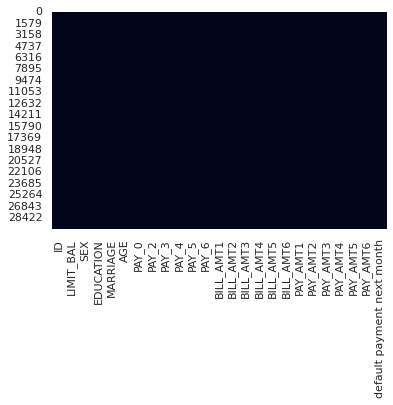

In [9]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset.isnull(), cbar=False)

### Understanding and Found some information about our dataset

Objective of our project is to predict which customer might default in upcoming months. Before going any fudther let's have a quick look on defination of what actually meant by **Credit Card Default**.

*   We are all aware what is credit card. It is type of payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.
*   Credit card default happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.



The above dataset has 30000 rows and 25 columns. There are no mising values and duplicate values in the dataset.

## **2. Now understanding the variables available in dataset** 

In [10]:
# Dataset column name
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [11]:
# Dataset description
dataset.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


### Attribute Information:

This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:



*   X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.

*   X2: Gender (1 = male; 2 = female).

*   X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).


*   X4: Marital status (1 = married; 2 = single; 3 = others).


*   X5: Age (year).
*   X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


*   X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.



*   X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.




### Features Description

We have records of 30001 customers. Below are the description of all features:

*ID: ID of each client*

*LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)*

*SEX: Gender (1 = male, 2 = female)*

*EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)*

*MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)*

*AGE: Age in years*

History of past payment

***We tracked the past monthly payment records from April to September, 2005.The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.***

PAY_0: Repayment status in September, 2005 (scale same as above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

Amount of bill statement (NT dollar)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

Amount of previous payment (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.


### Checking Unique Values for each variable in dataset

In [12]:
# For checking unique values in each column
for i in dataset.columns.tolist():
  print('No. of unique values in ',i,'is',dataset[i].nunique())

No. of unique values in  ID is 30000
No. of unique values in  LIMIT_BAL is 81
No. of unique values in  SEX is 2
No. of unique values in  EDUCATION is 7
No. of unique values in  MARRIAGE is 4
No. of unique values in  AGE is 56
No. of unique values in  PAY_0 is 11
No. of unique values in  PAY_2 is 11
No. of unique values in  PAY_3 is 11
No. of unique values in  PAY_4 is 11
No. of unique values in  PAY_5 is 10
No. of unique values in  PAY_6 is 10
No. of unique values in  BILL_AMT1 is 22723
No. of unique values in  BILL_AMT2 is 22346
No. of unique values in  BILL_AMT3 is 22026
No. of unique values in  BILL_AMT4 is 21548
No. of unique values in  BILL_AMT5 is 21010
No. of unique values in  BILL_AMT6 is 20604
No. of unique values in  PAY_AMT1 is 7943
No. of unique values in  PAY_AMT2 is 7899
No. of unique values in  PAY_AMT3 is 7518
No. of unique values in  PAY_AMT4 is 6937
No. of unique values in  PAY_AMT5 is 6897
No. of unique values in  PAY_AMT6 is 6939
No. of unique values in  default pay

## **3. Data Wrangling**

Changing name of some columns for simplicity and better understanding.

In [13]:
#renaming of columns
dataset.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
dataset.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
dataset.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
dataset.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace = True)

In [14]:
# View new columns
dataset.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_SEPT',
       'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR', 'BILL_AMT_SEPT',
       'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY',
       'BILL_AMT_APR', 'PAY_AMT_SEPT', 'PAY_AMT_AUG', 'PAY_AMT_JUL',
       'PAY_AMT_JUN', 'PAY_AMT_MAY', 'PAY_AMT_APR', 'IsDefaulter'],
      dtype='object')

## **4. EDA, Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

### **1. Univariate Analysis**

Univariate analysis explores each variable in a data set, separately. 

Uni means one, so in other words the data has only one variable. Univariate data requires to analyze each variable separately. 

It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own.

Now Below is some variables which we doing analysis over them:- 

#### 1. No of Defaulter

Here we analyze Target variable in which their how many defaulter and non defaulter in dataset

In [ ]:
#Checking value counts of Defaulter
dataset['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

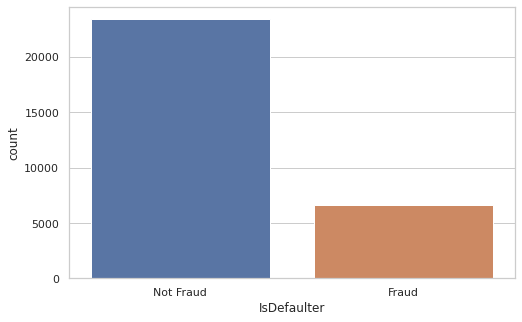

In [ ]:
#values count plot of IsDefaulter
plt.figure(figsize=(8,5))
dft=sns.countplot(x = 'IsDefaulter', data = dataset)
dft.set_xticklabels(['Not Fraud','Fraud'])
plt.show()

From Above count plot we can see that, Defaulters is 23364 which are less as compare to the Non-Defaulters which is 6636 in the given dataset.And also we can see that both classes are not in proportion that is we have an imbalanced dataset.

#### 2. Balance limit 

Here we analyze individual and family/supplementary credit limit

In [ ]:
#Checking value counts of LIMIT_BAL
dataset['LIMIT_BAL'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: LIMIT_BAL, Length: 81, dtype: int64

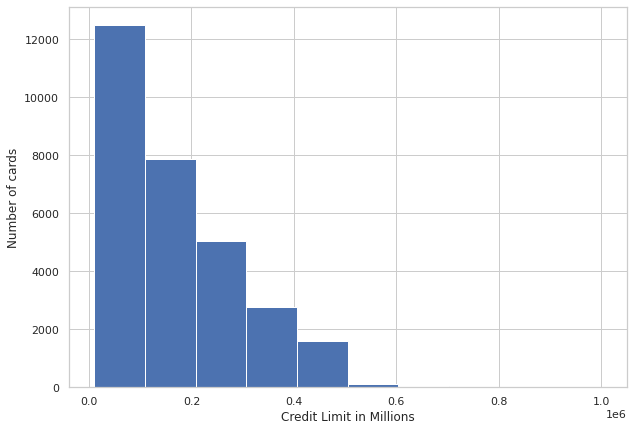

In [ ]:
# plotting Distribution of balance limit of card
plt.figure(figsize=(10,7))
plt.hist(dataset["LIMIT_BAL"])
plt.xlabel("Credit Limit in Millions")
plt.ylabel("Number of cards")
plt.show() 

from above histogram we can see that limit balance feature is right skewed, almost 70% of value lie between 10K to 200k.
few of limit goes beyond 500k taiwan dollar

#### 3. Sex

Here we analyze how many credit card consumer according to gender

In [ ]:
#Checking value counts of SEX
dataset['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

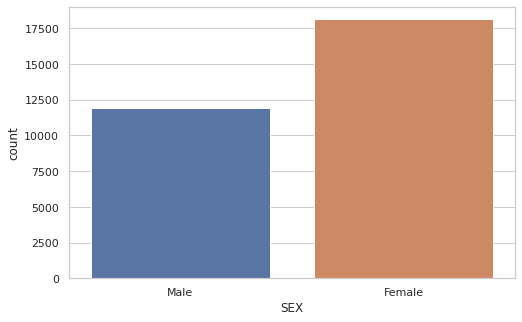

In [ ]:
#values count plot of SEX
plt.figure(figsize=(8,5))
dft=sns.countplot(x = 'SEX', data = dataset)
dft.set_xticklabels(['Male','Female'])
plt.show()

From Above count plot we can see that, Female credit card consumer more as compared to male credit card consumer in our dataset.

#### 4. Education

Here we analyze Education qualification of the card holder.

In [ ]:
#Checking value counts of Education
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

From information in our dataset:-

1 = graduate school; 2 = university; 3 = high school; 4 = others

so here 5, 6, 0 are unknown inforamtion so we want to mege it with 4(other) category.

In [ ]:
#replacing values with 5, 6 and 0 to Others
dataset.EDUCATION = dataset.EDUCATION.replace({5: "4", 6: "4",0: "4", 4:"4"})


In [ ]:
#Checking value counts of EDUCATION
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

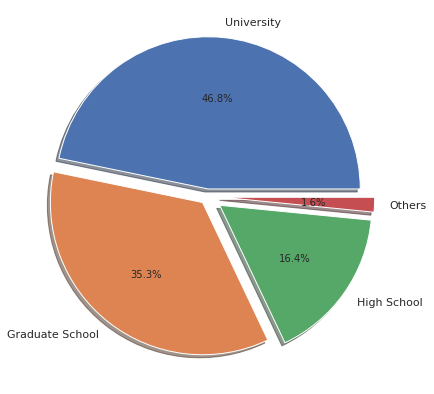

In [ ]:
# Pie chart for percentage of EDUCATION
y = dataset['EDUCATION'].value_counts()
plt.figure(figsize=(12,7))
mylabels = ['University', 'Graduate School', 'High School', 'Others']
myexplode = [0.05, 0.05, 0.1, 0.1]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%',shadow = True)
plt.show() 

From above pie chart we can see that 

*   University and Graduate School has maximum credit card holder which is 46.8 % and 35.3 % respectively.

*   High school have 16.4 % credit card holder and only 1.6 % Other credit card holder



#### 5. Marriage

Here we analyze Marital status of credit card holder

In [ ]:
#Checking value counts of MARRIAGE
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

From information in our dataset:-

Marital status (0 = others, 1 = married, 2 = single, 3 = others)

so here we merge 0 and 3 to the other category.

In [ ]:
#replacing values with 0 and 3 to Others
dataset.MARRIAGE = dataset.MARRIAGE.replace({0: "3", 3: "3"})

In [ ]:
#Checking value counts of MARRIAGE
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

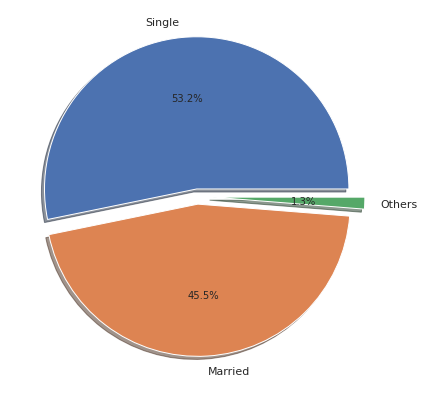

In [ ]:
# Pie chart for percentage of Marriage status
y = dataset['MARRIAGE'].value_counts()
plt.figure(figsize=(12,7))
mylabels = ['Single','Married','Others']
myexplode = [0.05, 0.05, 0.1]
plt.pie(y, labels = mylabels, explode = myexplode, autopct='%1.1f%%',shadow = True)
plt.show() 

From above pie chart we can see that:-

*   Number of credit card holder is maximum in singles which is 53.2 %.
*   Number of credit card holder Married is 45.5 %.

*   There are only 1.3 % Other credit card holder which might be chances to divorced or another reason.





#### 6. Age

Here we analyze distribution age of credit card holder.

In [ ]:
#Checking value counts of AGE
dataset['AGE'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: AGE, dtype: int64

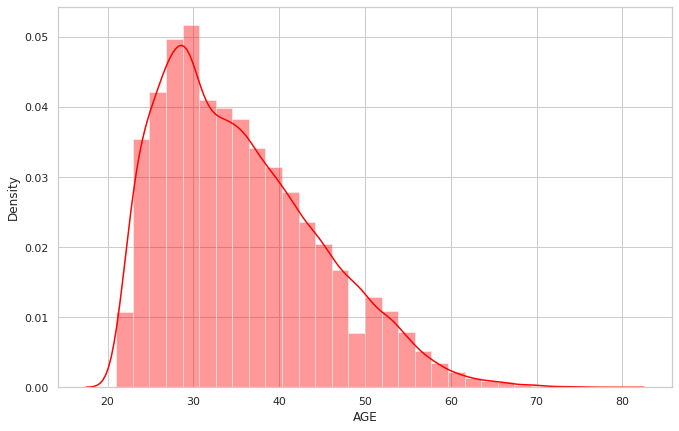

In [ ]:
# Distribution of density of age using distplot
sns.set_style('whitegrid')
plt.figure(figsize=(11,7))
sns.distplot(dataset['AGE'], kde = True, color ='red', bins = 30)

From above Distplot we can see that:-

*   Age feature is also right skewed, middle 50% of age is 22 to 42 years which means mostly working class people use credit card.
*   Few people above 60 years of age also uses the credit card.



### **2. Bivariate Analysis**

Bivariate analysis is one of the statistical analysis where two variables are observed. 

One variable here is dependent while the other is independent.

here we analyse the changes occured between the two variables and to what extent.

Now Below is some variables which we doing analysis over them:-

#### 1. Balance Limt VS Defaulter 

Here we analyze that how many defaulter with different range of credit balance limit.

In [ ]:
# Creating new column LimitBin with range
dataset['LimitBin'] = pd.cut(dataset['LIMIT_BAL'],[10000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
dataset['LimitBin'].value_counts()

(10000, 50000]       7183
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: LimitBin, dtype: int64

In [ ]:
# Group together IsDefaulter and LimitBin column
dataset['IsDefaulter'].groupby(dataset['LimitBin']).value_counts()

LimitBin           IsDefaulter
(10000, 50000]     0              4940
                   1              2243
(50000, 100000]    0              3578
                   1              1244
(100000, 150000]   0              3077
                   1               825
(150000, 200000]   0              3268
                   1               710
(200000, 300000]   0              4247
                   1               812
(300000, 400000]   0              2371
                   1               388
(400000, 500000]   0              1404
                   1               194
(500000, 1100000]  0               183
                   1                23
Name: IsDefaulter, dtype: int64

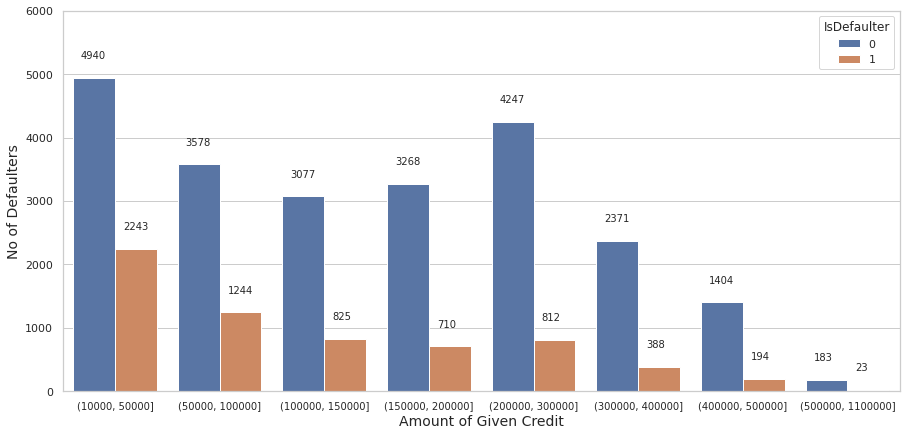

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = dataset, x = 'LimitBin', hue="IsDefaulter")

plt.xlabel("Amount of Given Credit", fontsize= 14)
plt.ylabel("No of Defaulters", fontsize= 14)
plt.ylim(0,6000)
ax.tick_params(axis='x', labelsize= 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()


From above countplot we can see that:-

*   There are almost 60 % which is 3487 defaulter come between 10000 to 100000 Credit card balance limit
*   We also can see that the higher the credit card balance limit, the lower is the chance of defaulting.



In [ ]:
# Drop LimitBin column
dataset=dataset.drop(['LimitBin'],axis=1)

#### 2. Sex VS Defaulter

Here we analyze that how many defaulter according to different genders.

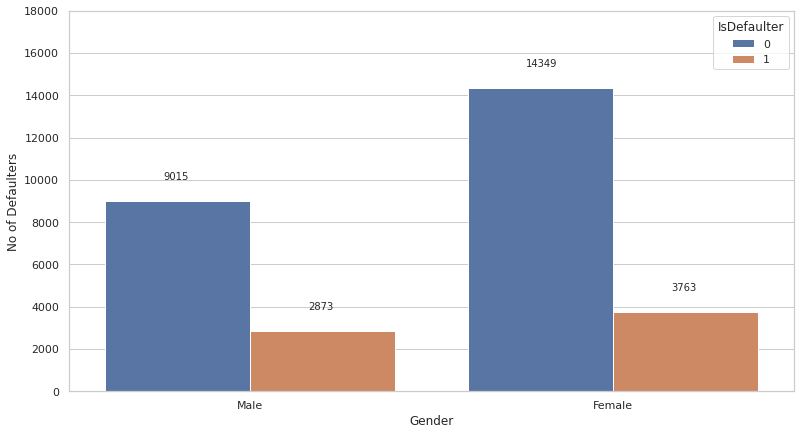

In [ ]:
plt.figure(figsize=(13,7))
ax = sns.countplot(data = dataset, x = 'SEX', hue='IsDefaulter')

plt.xlabel('Gender', fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,18000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

From above countplot we can see that:-

*   There are more women than men in our dataset because of this their defaulter value is more which is 3763 and their percentage of dafaulter is 20 %.
*   There are less men compare to women in our dataset because of this their defaulter value is less which is 2873 but their percentage of dafaulter is 24 %.

*   So comparitively men have a slightly higher chance of default.





#### 3. Education VS Defaulter

Here we analyze that how many defaulter according to their Education qualification.

In [ ]:
#Checking value counts of Education
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others

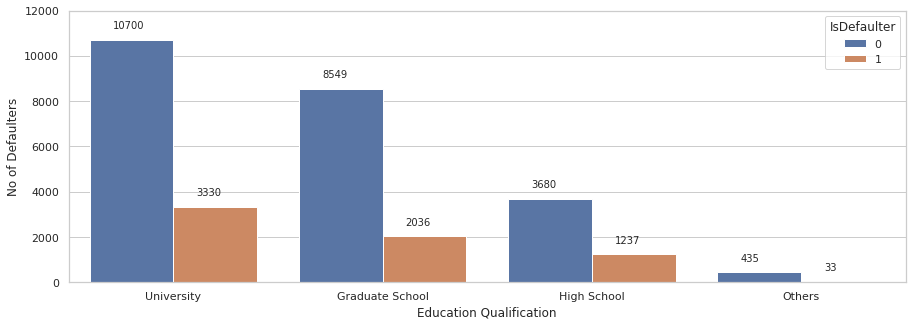

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = dataset, x = 'EDUCATION', hue="IsDefaulter")

plt.xlabel("Education Qualification", fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,12000)
plt.xticks([0,1,2,3],['University','Graduate School','High School','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.11, p.get_height()+500))

plt.show()


From above countplot we can see that:-

*   As the number of university and graduate school credit card holder is higher which is 10700 & 8549. also their credit card default are also higher which is 3330 & 2036.
*   High school have less Credit card holder which is 3680 so their defaulter is less which is 1237. 

*   Other have very less credit card holder which is 435 so their defauler is very less which is 33.





#### 4. Marriage VS Defaulter

Here we analyze that how many defaulter according to their marital status.

In [ ]:
dataset['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

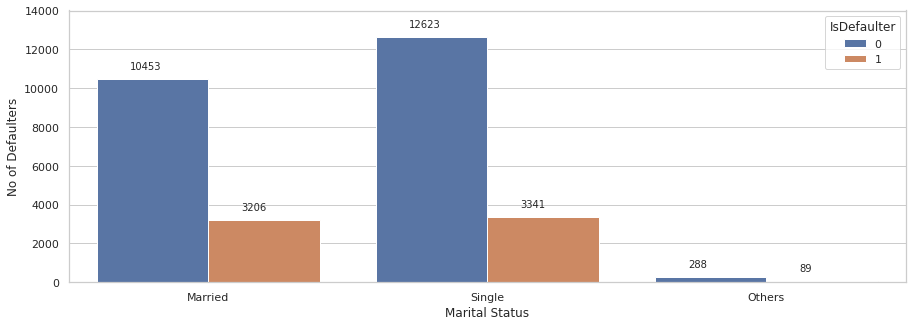

In [ ]:
plt.figure(figsize=(15,5))

ax = sns.countplot(data = dataset, x = 'MARRIAGE', hue="IsDefaulter")

plt.xlabel('Marital Status', fontsize= 12)
plt.ylabel("No of Defaulters", fontsize= 12)
plt.ylim(0,14000)
plt.xticks([0,1,2],['Married','Single','Others'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.12, p.get_height()+500))

plt.show()

From above countplot we can see that:-

*   Number of credit card holder is maximum in singles as compare to married which is 12623 in single & 10453 in married but credit card defaulter are almost same in case of single and married people which is 3341 in single & 3206 in married.
*   Other people have less credit card holder so their defaulter is less which is only 89.



#### 5. Age VS Defaulter

Here we analyze that how many defaulter according to different ages of credit card holder.

In [ ]:
# Creating new column Age Range with range
dataset['Age Range'] = pd.cut(dataset['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
dataset['Age Range'].value_counts()

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: Age Range, dtype: int64

In [ ]:
# Group together IsDefaulter and Age Range column
dataset['IsDefaulter'].groupby(dataset['Age Range']).value_counts()

Age Range  IsDefaulter
(20, 25]   0              2839
           1              1032
(25, 30]   0              5703
           1              1439
(30, 35]   0              4670
           1              1126
(35, 40]   0              3854
           1              1063
(40, 50]   0              4606
           1              1399
(50, 60]   0              1493
           1               504
(60, 80]   0               199
           1                73
Name: IsDefaulter, dtype: int64

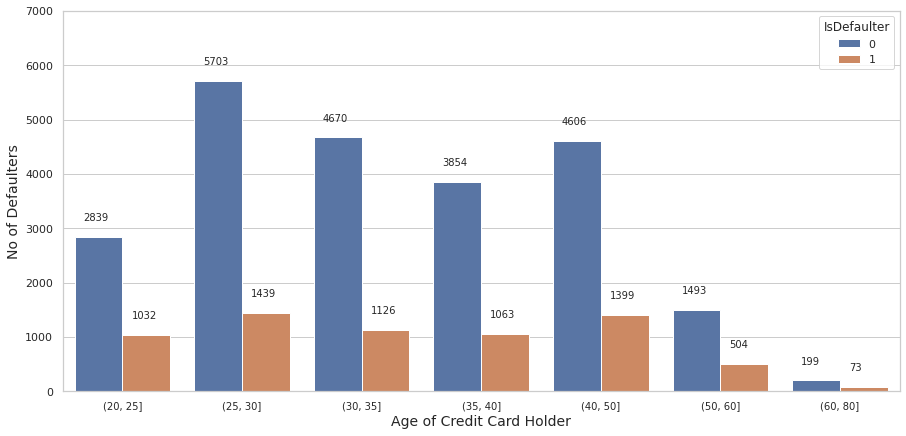

In [ ]:
plt.figure(figsize=(15,7))
ax = sns.countplot(data = dataset, x = 'Age Range', hue="IsDefaulter")

plt.xlabel("Age of Credit Card Holder", fontsize= 14)
plt.ylabel("No of Defaulters", fontsize= 14)
plt.ylim(0,7000)
ax.tick_params(axis='x', labelsize= 10)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.075, p.get_height()+300))

plt.show()

From above countplot we can see that:-

*   Most of the defaulter cases happen in 25 to 30 age group which is 1439 dafaulter with 25 % defaulter ratio and 40 to 50 age group which is 1399 dafaulter with 30 % dafaulter ratio.
*   Age group 30 to 40 have 2189 defaulter with 25 % defaulter ratio.

*   Age group(20 to 25 & 50 to 60 & 60 to 80) have less credit card holder and  their defaulter is 1609 but their defaulter ratio is high which is 35 %. 





In [ ]:
# Drop Age Range column
dataset=dataset.drop(['Age Range'],axis=1)

### **3. Multivariate Analysis**

Multivariate analysis (MVA) involves evaluating multiple variables (more than two) to identify any possible association among them. 



#### 1. Heatmap



What is Heatmap

A heat map is a two-dimensional representation of data in which values are represented by colors. A simple heat map provides an immediate visual summary of information. More elaborate heat maps allow the viewer to understand complex data sets.

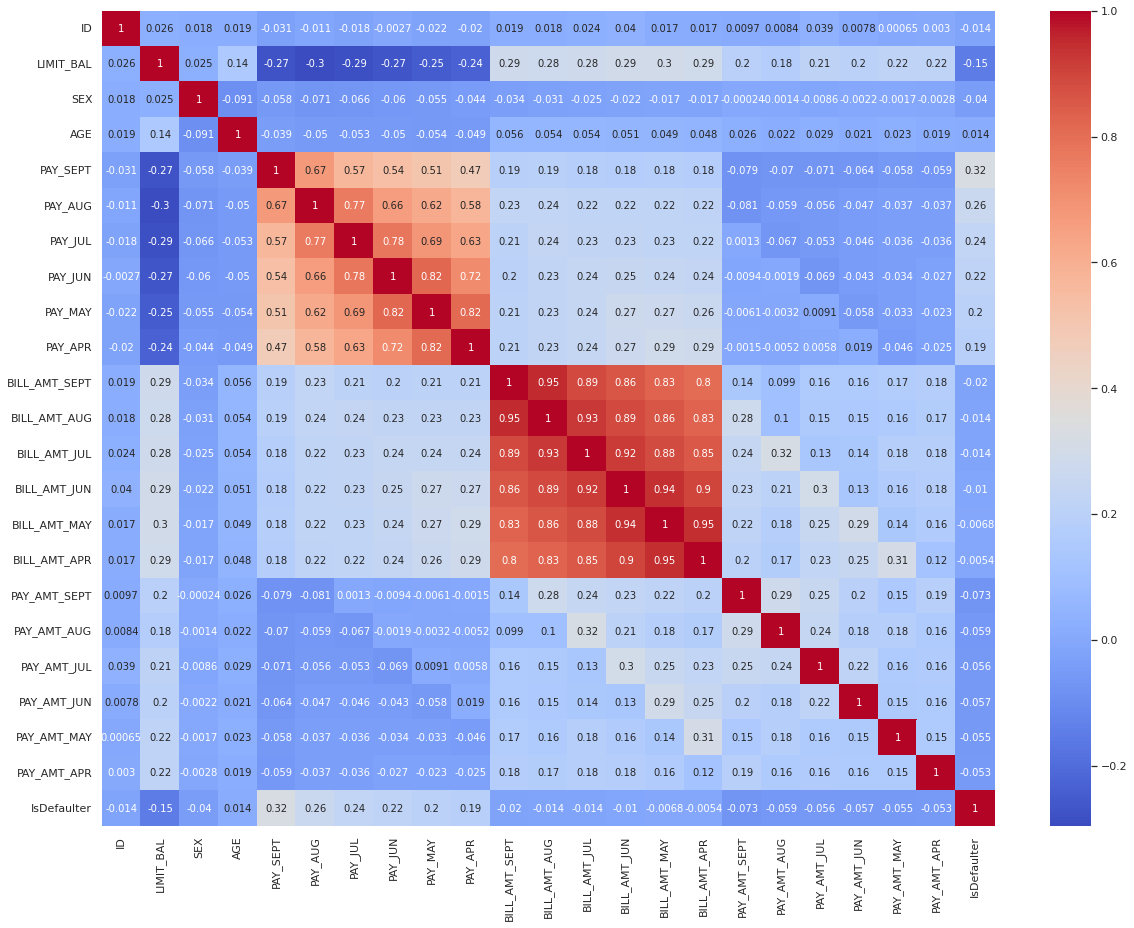

In [ ]:
# Using heatmap to understand relationship between multiple variable
plt.figure(figsize=(20,15))
sns.heatmap(dataset.corr(),annot=True,cmap="coolwarm")
plt.show()

From above Heatmap we can see that:-

*   There are highly correlation between bill amount column and also there are highly correlation between pay amount column.
*   except bill amount and pay amount column there are no any highly correlation between column.





## **5. Hypothesis Testing**

What is Hypothesis Testing:-

Hypothesis Testing is a type of statistical analysis in which you put your assumptions about a population parameter to the test. the theory, methods, and practice of testing a hypothesis by comparing it with the null hypothesis. The null hypothesis is only rejected if its probability falls below a predetermined significance level, in which case the hypothesis being tested is said to have that level of significance.

Below we creating some function parameter which is usefull in hypothesis testing:-

In [ ]:
# Creating Parameter Class 
class findz:
  def proportion(self,sample,hyp,size):
    return (sample - hyp)/math.sqrt(hyp*(1-hyp)/size)
  def mean(self,hyp,sample,size,std):
    return (sample - hyp)*math.sqrt(size)/std
  def varience(self,hyp,sample,size):
    return (size-1)*sample/hyp

variance = lambda x : sum([(i - np.mean(x))**2 for i in x])/(len(x)-1)
zcdf = lambda x: norm(0,1).cdf(x)
# Creating a function for getting P value
def p_value(z,tailed,t,hypothesis_number,df,col):
  if t!="true":
    z=zcdf(z)
    if tailed=='l':
      return z
    elif tailed == 'r':
      return 1-z
    elif tailed == 'd':
      if z>0.5:
        return 2*(1-z)
      else:
        return 2*z
    else:
      return np.nan
  else:
    z,p_value=stats.ttest_1samp(df[col],hypothesis_number)
    return p_value
    
  


# Conclusion about the P - Value
def conclusion(p):
  significance_level = 0.05
  if p>significance_level:
    return f"Failed to reject the Null Hypothesis for p = {p}."
  else:
    return f"Null Hypothesis rejected Successfully for p = {p}"

# Initializing the class
findz = findz()

### Hypothesis testing - 1

Average trip duration is 1000 seconds for vendor id 1

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 1000

Alternate Hypothesis : N < 1000

Test Type : Left Tailed Test

#### 2. Performing statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_2=dataset[(dataset["trip_duration"]==1000)]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_2["trip_duration"].mean()
size = len(hypo_2)
std=(variance(hypo_2["trip_duration"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="1000",hypothesis_number=hypothesis_number,df=hypo_2,col="trip_duration")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


I have used t-Test as the statistical testing to obtain P-Value and found the result that Null hypothesis has been rejected.

we got probability of 0.0 so vendor id have not average trip duration of 1000 seconds thats why we reject them

In [ ]:
mean_median_difference=hypo_2["trip_duration"].mean()- hypo_2["trip_duration"].median()
print("Mean Median Difference is :-",mean_median_difference)

Mean Median Difference is :- 0.0


also there are big difference between mean and median

#### 3. Why did we choose the specific statistical test?

NameError: ignored

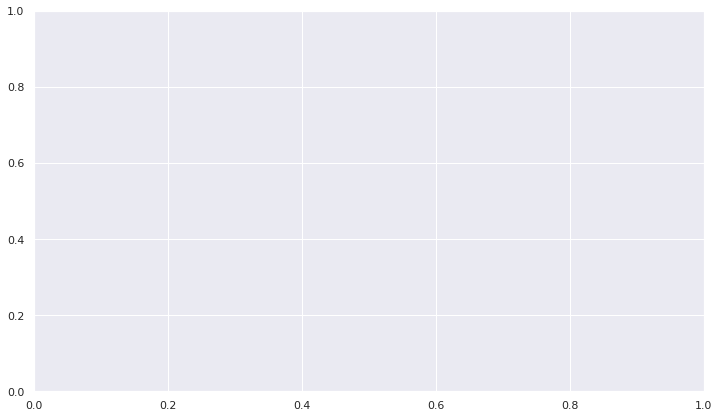

In [ ]:
fig=plt.figure(figsize=(12,7))
ax=fig.gca()
feature= (hypo_2["trip_duration"])
sns.distplot(hypo_2["trip_duration"])
ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
ax.set_title('col')
plt.show()

From the above chart we can see median is greater than mean over -173.079. So, the distribution is rightly skewed. For a skewed data Z-Test can't be performed.

Non-parametric tests are most useful for small studies. Using non-parametric tests in large studies may provide answers to the wrong question, thus confusing readers. For studies with a large sample size, t-tests and their corresponding confidence intervals can and should be used even for heavily skewed data.

So, for a skewed data we can use T-test for better result. Thus, I used t - test.

### 2. Hypithesis Testing - 2

#### 1. null hypothesis and alternate hypothesis.

Null Hypothesis : N = 3 (Wednesday)

Alternate Hypothesis : N !=3

Test Type : right Tailed Test

In [ ]:
# Perform Statistical Test to obtain P-Value
hypo_1=dataset[(dataset.mean())]
# Getting the required parameter values for hypothesis testing
hypothesis_number = 2
sample_mean = hypo_1["weekday_num"].mean()
size = len(hypo_1)
std=(variance(hypo_1["weekday_num"]))**0.5

In [ ]:
# Getting Z value
z = findz.mean(hypothesis_number,sample_mean,size,std)
# Getting P - Value
p = p_value(z=z,tailed='r',t="3",hypothesis_number=hypothesis_number,df=hypo_2,col="weekday_num")
# Getting Conclusion
print(conclusion(p))

Null Hypothesis rejected Successfully for p = 0.0


In [ ]:
sample_mean

3.1666666666666665

## **6. Feature Engineering & Data Pre-processing**


As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)

### SMOTE(Synthetic Minority Oversampling Technique)

In [15]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(dataset.iloc[:,:], dataset['IsDefaulter'])

print('Original dataset shape', len(dataset))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [16]:
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,5038,70000,2,2,1,33,1,2,0,0,...,54735,56029,57203,1449,3536,3752,2327,2256,2213,1
46724,2415,30000,1,2,1,37,0,-1,-1,0,...,2698,0,0,2266,3643,2692,0,0,0,1
46725,8398,20000,1,2,1,45,0,1,0,0,...,10657,-117,-117,44,10397,804,0,0,0,1
46726,18289,30000,2,2,1,47,1,2,2,0,...,10828,10841,11691,2838,0,1385,248,1026,0,1


In [17]:
columns = list(dataset.columns)

In [18]:
columns.pop()

'IsDefaulter'

In [19]:
balance_df = pd.DataFrame(x_smote, columns=columns)

In [20]:
balance_df['IsDefaulter'] = y_smote

<AxesSubplot:xlabel='IsDefaulter', ylabel='count'>

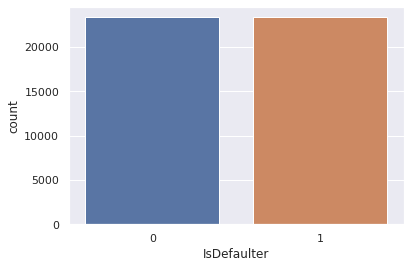

In [21]:
sns.countplot('IsDefaulter', data = balance_df)

In [22]:
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,5038,70000,2,2,1,33,1,2,0,0,...,54735,56029,57203,1449,3536,3752,2327,2256,2213,1
46724,2415,30000,1,2,1,37,0,-1,-1,0,...,2698,0,0,2266,3643,2692,0,0,0,1
46725,8398,20000,1,2,1,45,0,1,0,0,...,10657,-117,-117,44,10397,804,0,0,0,1
46726,18289,30000,2,2,1,47,1,2,2,0,...,10828,10841,11691,2838,0,1385,248,1026,0,1


### Feature Engineering 

Feature engineering is the pre-processing step of machine learning, which is used to transform raw data into features that can be used for creating a predictive model using Machine learning or statistical Modelling. Feature engineering in machine learning aims to improve the performance of models.


In [23]:
df_fr = balance_df.copy()

In [24]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']

In [25]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.980140
1    1.700051
Name: Payement_Value, dtype: float64

<AxesSubplot:xlabel='IsDefaulter', ylabel='Payement_Value'>

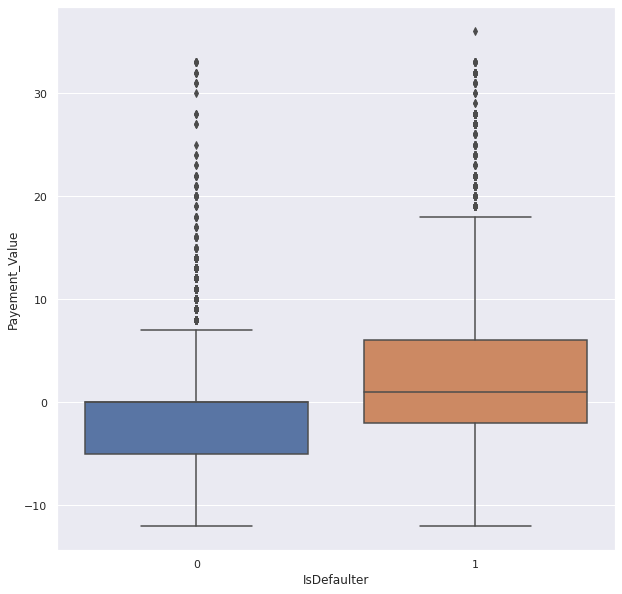

In [26]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [27]:
# Creating dues column
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])

In [28]:
df_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    187742.051532
1    193087.031501
Name: Dues, dtype: float64

In [29]:
df_fr['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

In [30]:
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [31]:
df_fr['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [32]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [33]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [34]:
df_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


### One Hot Encoding

One-hot encoding in machine learning is the conversion of categorical information into a format that may be fed into machine learning algorithms to improve prediction accuracy. One-hot encoding is a common method for dealing with categorical data in machine learning.

In [35]:
# Creating new column df_fr
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [36]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,Payement_Value,Dues,EDUCATION_5,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,-2,3913,0,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,3,10352,0,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,76608,0,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,174713,0,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,-2,44620,0,0,0,0,1,1,0,0


In [37]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [38]:
# Doing One Hot Encoding using dummies
df_fr = pd.get_dummies(df_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [39]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [40]:
# Label Encoding For Sex
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_fr = df_fr.replace(encoders_nums)

In [41]:
df_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [42]:
# Drop 'ID' column
df_fr.drop('ID',axis = 1, inplace = True)

In [43]:
df_fr.to_csv('Final_df.csv')

In [44]:
df_fr = pd.read_csv('./Final_df.csv')

In [45]:
df_fr.head()

,Unnamed: 0,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,0,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,2,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,3,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,4,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [46]:
# Drop 'Unnamed: 0' column
df_fr.drop(['Unnamed: 0'],axis = 1, inplace = True)

### Training and Scaling the Data

In [47]:
df_log_reg = df_fr.copy()

In [48]:
df_log_reg.head()

,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,20000,0,24,3913,3102,689,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,120000,0,26,2682,1725,2682,3272,3455,3261,0,...,0,0,0,1,0,0,0,0,0,0
2,90000,0,34,29239,14027,13559,14331,14948,15549,1518,...,0,1,0,0,0,0,0,0,0,0
3,50000,0,37,46990,48233,49291,28314,28959,29547,2000,...,0,1,0,0,0,0,0,0,0,0
4,50000,1,57,8617,5670,35835,20940,19146,19131,2000,...,0,1,0,0,0,0,0,0,0,0


In [49]:
# Seperating dependant and independant variabales
X = df_log_reg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_log_reg['IsDefaulter']

In [50]:
columns = X.columns

In [51]:
# Scaling the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
# Next a train and test data split is created for the scaled data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

## **7. ML Model Implementation**

What is model in machine learning:-

*   A machine learning model is a file that has been trained to recognize certain types of patterns. You train a model over a set of data, providing it an algorithm that it can use to reason over and learn from those data.

*   We need a model to train on our dataset to serve our purpose of prediciting the Credit Card Defaulter given the other features as training and test set. Since our dependent variable is binary variables so we will use classification technique to predict our output.

While in every machine learning problem, it’s a good rule of thumb to try a variety of algorithms, it can be especially beneficial with imbalanced datasets.





### ML Model 1 - **Logistic Regression**


Logistic regression is a data analysis technique that uses mathematics to find the relationships between two data factors.It is used to calculate or predict the probability of a binary (yes/no) event occurring.

In [ ]:
# Fitting data into Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression()

In [ ]:
# Predicted Probability
train_preds = logmodel.predict_proba(X_train)[:,1]
test_preds = logmodel.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds = logmodel.predict(X_train)
test_class_preds = logmodel.predict(X_test)

In [ ]:
# Getting all scores for Logistic Regression
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on train data is  0.7529625962244866
The accuracy on test data is  0.7516373776019714
The precision on test data is  0.6888456549935149
The recall on test data is  0.7877484425986354
The f1 on test data is  0.734984777193468
The roc_score on test data is  0.7556670545750406


We have implemented logistic regression and we getting scores nearly 75% all and f1-sore approx 73%. As we have imbalanced dataset, F1- score is better parameter.

[[12780  2873]
 [ 4861 10793]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

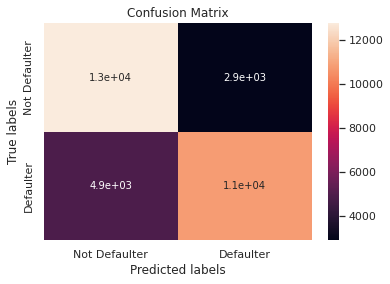

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

#annot=True to annotate cells
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

The logistic regression model did a good job accurately predicting when a client would not default, but did not do very well predicting when a client would default.

###  ML Model 2 - **Decision Tree Classifier**

The decision tree classifier (Pang-Ning et al., 2006) creates the classification model by building a decision tree. Each node in the tree specifies a test on an attribute, each branch descending from that node corresponds to one of the possible values for that attribute.Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [ ]:
# Fitting data into Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# Predicted Probability
train_preds_dtc = dtc.predict_proba(X_train)[:,1]
test_preds_dtc = dtc.predict_proba(X_test)[:,1]

In [ ]:
# Get the predicted classes
train_class_preds_dtc = dtc.predict(X_train)
test_class_preds_dtc = dtc.predict(X_test)

In [ ]:
# Getting all scores for Decision Tree Classifier
train_accuracy_dtc = accuracy_score(train_class_preds_dtc,y_train)
test_accuracy_dtc = accuracy_score(test_class_preds_dtc,y_test)
test_precision_score_dtc = precision_score(test_class_preds_dtc,y_test)
test_recall_score_dtc = recall_score(test_class_preds_dtc,y_test)
test_f1_score_dtc = f1_score(test_class_preds_dtc,y_test)
test_roc_score_dtc = roc_auc_score(test_class_preds_dtc,y_test)

print("The accuracy on train data is ", train_accuracy_dtc)
print("The accuracy on test data is ", test_accuracy_dtc)
print("The precision on test data is ", test_precision_score_dtc)
print("The recall on test data is ", test_recall_score_dtc)
print("The f1 on test data is ", test_f1_score_dtc)
print("The roc_score on test data is ", test_roc_score_dtc)

The accuracy on train data is  0.999520873925959
The accuracy on test data is  0.7478114259775631
The precision on test data is  0.7573281452658884
The recall on test data is  0.7431589665266641
The f1 on test data is  0.7501766557461296
The roc_score on test data is  0.7479015350877637


[[15650     3]
 [   12 15642]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

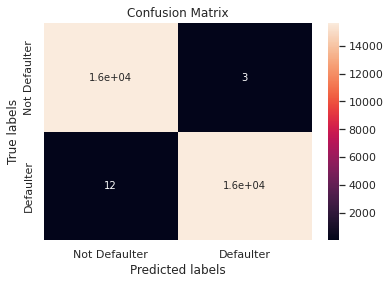

In [ ]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm_dtc = confusion_matrix(y_train, train_class_preds_dtc)
print(cm_dtc)

#annot=True to annotate cells
ax= plt.subplot()
sns.heatmap(cm_dtc, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model 3 - **Support Vector Machine(SVM)**


Support Vector Machine(SVM) is a supervised machine learning algorithm used for both classification and regression. Though we say regression problems as well its best suited for classification. The objective of SVM algorithm is to find a hyperplane in an N-dimensional space that distinctly classifies the data points.

In [53]:
# Fitting data into Support Vector Classifier
svm=SVC(probability=True)
svm.fit(X_train,y_train)

SVC(probability=True)

In [54]:
# Predicted Probability
train_preds_svm = svm.predict_proba(X_train)[:,1]
test_preds_svm = svm.predict_proba(X_test)[:,1]

In [55]:
# Get the predicted classes
train_class_preds_svm = svm.predict(X_train)
test_class_preds_svm = svm.predict(X_test)

In [56]:
# Getting all scores for Support Vector Classifier
train_accuracy_svm = accuracy_score(train_class_preds_svm,y_train)
test_accuracy_svm = accuracy_score(test_class_preds_svm,y_test)
test_precision_score_svm = precision_score(test_class_preds_svm,y_test)
test_recall_score_svm = recall_score(test_class_preds_svm,y_test)
test_f1_score_svm = f1_score(test_class_preds_svm,y_test)
test_roc_score_svm = roc_auc_score(test_class_preds_svm,y_test)

print("The accuracy on train data is ", train_accuracy_svm)
print("The accuracy on test data is ", test_accuracy_svm)
print("The precision on test data is ", test_precision_score_svm)
print("The recall on test data is ", test_recall_score_svm)
print("The f1 on test data is ", test_f1_score_svm)
print("The roc_score on test data is ", test_roc_score_svm)

The accuracy on train data is  0.7870763726962021
The accuracy on test data is  0.7741391608845082
The precision on test data is  0.7050583657587549
The recall on test data is  0.818058690744921
The f1 on test data is  0.7573667711598745
The roc_score on test data is  0.7794714602311661


[[13463  2190]
 [ 4476 11178]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

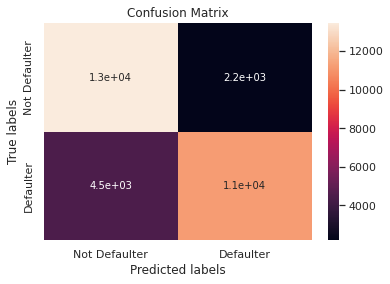

In [57]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm_svm = confusion_matrix(y_train, train_class_preds_svm)
print(cm_svm)

#annot=True to annotate cells
ax= plt.subplot()
sns.heatmap(cm_svm, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model 4 - **Random Forest Classifier**

Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset." Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions, and it predicts the final output.

In [58]:
# Fitting data into Random Forest Classifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [59]:
# Predicted Probability
train_preds_rfc = rfc.predict_proba(X_train)[:,1]
test_preds_rfc = rfc.predict_proba(X_test)[:,1]

In [60]:
# Get the predicted classes
train_class_preds_rfc = rfc.predict(X_train)
test_class_preds_rfc = rfc.predict(X_test)

In [61]:
# Getting all scores for Random Forest Classifier
train_accuracy_rfc = accuracy_score(train_class_preds_rfc,y_train)
test_accuracy_rfc = accuracy_score(test_class_preds_rfc,y_test)
test_precision_score_rfc = precision_score(test_class_preds_rfc,y_test)
test_recall_score_rfc = recall_score(test_class_preds_rfc,y_test)
test_f1_score_rfc = f1_score(test_class_preds_rfc,y_test)
test_roc_score_rfc = roc_auc_score(test_class_preds_rfc,y_test)

print("The accuracy on train data is ", train_accuracy_rfc)
print("The accuracy on test data is ", test_accuracy_rfc)
print("The precision on test data is ", test_precision_score_rfc)
print("The recall on test data is ", test_recall_score_rfc)
print("The f1 on test data is ", test_f1_score_rfc)
print("The roc_score on test data is ", test_roc_score_rfc)

The accuracy on train data is  0.9993931069728814
The accuracy on test data is  0.8345762272226185
The precision on test data is  0.8020752269779508
The recall on test data is  0.8578166181162435
The f1 on test data is  0.829009987264562
The roc_score on test data is  0.8359954985369333


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

In [63]:
# Now we are doing hyperparameter tuning GridSearchCV
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [64]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [65]:
# Finding best score
grid_rf_clf.best_score_

0.8224679122046846

In [66]:
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 200}

In [67]:
optimal_rf_clf = grid_rf_clf.best_estimator_

In [74]:
# New Predicted Probability
train_preds_rfc1 = optimal_rf_clf.predict_proba(X_train)[:,1]
test_preds_rfc1 = optimal_rf_clf.predict_proba(X_test)[:,1]

In [75]:
# Get the New predicted classes
train_class_preds_rfc1 = optimal_rf_clf.predict(X_train)
test_class_preds_rfc1 = optimal_rf_clf.predict(X_test)

In [76]:
# Getting all scores for Random Forest Classifier
train_accuracy_rfc1 = accuracy_score(train_class_preds_rfc1,y_train)
test_accuracy_rfc1 = accuracy_score(test_class_preds_rfc1,y_test)
test_precision_score_rfc1 = precision_score(test_class_preds_rfc1,y_test)
test_recall_score_rfc1 = recall_score(test_class_preds_rfc1,y_test)
test_f1_score_rfc1 = f1_score(test_class_preds_rfc1,y_test)
test_roc_score_rfc1 = roc_auc_score(test_class_preds_rfc1,y_test)

print("The accuracy on train data is ", train_accuracy_rfc1)
print("The accuracy on test data is ", test_accuracy_rfc1)
print("The precision on test data is ", test_precision_score_rfc1)
print("The recall on test data is ", test_recall_score_rfc1)
print("The f1 on test data is ", test_f1_score_rfc1)
print("The roc_score on test data is ", test_roc_score_rfc1)

The accuracy on train data is  0.9984987383013384
The accuracy on test data is  0.8345113805849167
The precision on test data is  0.8025940337224384
The recall on test data is  0.85730119146578
The f1 on test data is  0.8290460878885316
The roc_score on test data is  0.8358796582709859


We can see from above results that we are getting around 99% train accuracy and 83% for test accuracy even after we use hyperparameter gridsearchcv the model will not get accuracy which depicts that model is overfitting. However our f1-score is still around 82% after using hyperparameter gridsearchcv which is not bad.

[[15635    18]
 [   29 15625]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

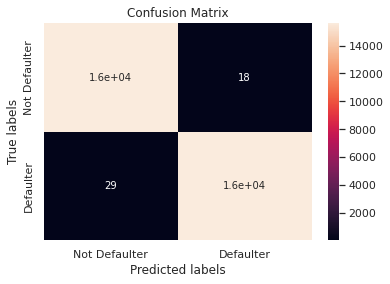

In [77]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm_rfc = confusion_matrix(y_train, train_class_preds_rfc1)
print(cm_rfc)

#annot=True to annotate cells
ax= plt.subplot()
sns.heatmap(cm_rfc, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

### ML Model 5 - **XGBoost Classifier**

Why we use XGBoost Classifier:-

XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library. It uses gradient boosting (GBM) framework at core. It belongs to a family of boosting algorithms that convert weak learners into strong learners. A weak learner is one which is slightly better than random guessing.

Boosting' here is a sequential process; i.e., trees are grown using the information from a previously grown tree one after the other. This process slowly learns from data and tries to improve its prediction in the subsequent iterations.

XGBoost (eXtreme Gradient Boosting) is a popular supervised-learning algorithm used for regression and classification on large datasets. It uses sequentially-built shallow decision trees to provide accurate results and a highly-scalable training method that avoids overfitting.

In [79]:
# Fitting data into XG Boosting Classifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier()

In [80]:
# Predicted Probability
train_preds_xgb = xgb.predict_proba(X_train)[:,1]
test_preds_xgb = xgb.predict_proba(X_test)[:,1]

In [81]:
# Get the predicted classes
train_class_preds_xgb = xgb.predict(X_train)
test_class_preds_xgb = xgb.predict(X_test)

In [82]:
# Getting all scores for XGBoostClassifier
train_accuracy_xgb = accuracy_score(train_class_preds_xgb,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds_xgb,y_test)
test_precision_score_xgb = precision_score(test_class_preds_xgb,y_test)
test_recall_score_xgb = recall_score(test_class_preds_xgb,y_test)
test_f1_score_xgb = f1_score(test_class_preds_xgb,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds_xgb,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_score_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on test data is ", test_roc_score_xgb)

The accuracy on train data is  0.7786437537930814
The accuracy on test data is  0.7717398352895403
The precision on test data is  0.7084306095979248
The recall on test data is  0.8111078111078112
The f1 on test data is  0.7563001938521186
The roc_score on test data is  0.7761651637558165


In [83]:
# Hyperparameter Grid
param_dict = {'learning_rate': [0.15, 0.1, 0.05],
              'n_estimators' : [200, 250],
              'max_depth' : [15,20,25],
              'min_child_weight' : [1,3],
              'gamma': [0.3, 0.2, 0.1],
              'min_samples_leaf' : [40, 50]}

In [86]:
# Create an instance of the XGBoostClassifier
xgb = XGBClassifier()

# Grid search
xgb_grid = RandomizedSearchCV(estimator=xgb,
                       param_distributions = param_dict,
                       n_jobs=-1, n_iter=5, cv = 3,
                       verbose=2, scoring='roc_auc')
# fitting model
xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3, estimator=XGBClassifier(), n_iter=5, n_jobs=-1,
                   param_distributions={'gamma': [0.3, 0.2, 0.1],
                                        'learning_rate': [0.15, 0.1, 0.05],
                                        'max_depth': [15, 20, 25],
                                        'min_child_weight': [1, 3],
                                        'min_samples_leaf': [40, 50],
                                        'n_estimators': [200, 250]},
                   scoring='roc_auc', verbose=2)

In [87]:
xgb_grid.best_estimator_

XGBClassifier(gamma=0.1, max_depth=20, min_samples_leaf=40, n_estimators=250)

In [88]:
xgb_grid.best_params_

{'n_estimators': 250,
 'min_samples_leaf': 40,
 'min_child_weight': 1,
 'max_depth': 20,
 'learning_rate': 0.1,
 'gamma': 0.1}

In [89]:
xgb_optimal_model = xgb_grid.best_estimator_

In [90]:
# Predicted Probability
train_preds_xgb_grid = xgb_optimal_model.predict_proba(X_train)[:,1]
test_preds_xgb_grid = xgb_optimal_model.predict_proba(X_test)[:,1]

In [91]:
# Get the predicted classes
train_class_preds_xgb_grid = xgb_optimal_model.predict(X_train)
test_class_preds_xgb_grid = xgb_optimal_model.predict(X_test)

In [92]:
# Getting all scores for XGBoostClassifier
train_accuracy_xgb_grid = accuracy_score(train_class_preds_xgb_grid,y_train)
test_accuracy_xgb_grid = accuracy_score(test_class_preds_xgb_grid,y_test)
test_precision_score_xgb_grid = precision_score(test_class_preds_xgb_grid,y_test)
test_recall_score_xgb_grid = recall_score(test_class_preds_xgb_grid,y_test)
test_f1_score_xgb_grid = f1_score(test_class_preds_xgb_grid,y_test)
test_roc_score_xgb_grid = roc_auc_score(test_class_preds_xgb_grid,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_grid)
print("The accuracy on test data is ", test_accuracy_xgb_grid)
print("The precision on test data is ", test_precision_score_xgb_grid)
print("The recall on test data is ", test_recall_score_xgb_grid)
print("The f1 on test data is ", test_f1_score_xgb_grid)
print("The roc_score on test data is ", test_roc_score_xgb_grid)

The accuracy on train data is  0.9989139808988405
The accuracy on test data is  0.8470267816613709
The precision on test data is  0.8233463035019455
The recall on test data is  0.8642614023144997
The f1 on test data is  0.8433078711391564
The roc_score on test data is  0.847806778423223


[[15637    16]
 [   18 15636]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

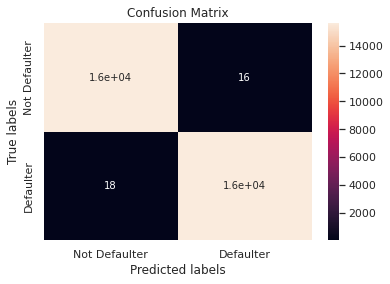

In [93]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm_xgb = confusion_matrix(y_train, train_class_preds_xgb_grid)
print(cm_xgb)

#annot=True to annotate cells
ax= plt.subplot()
sns.heatmap(cm_xgb, annot=True, ax = ax) 

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

## **Evaluating the models**

In [94]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [ ]:
classifiers = ['Logistic Regression','Decision Tree Classifier','SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr,train_accuracy_dtc, train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_grid]
test_accuracy = [test_accuracy_lr,test_accuracy_dtc, test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_grid]
precision_score = [test_precision_score_lr,test_precision_score_dtc, test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_grid]
recall_score = [test_recall_score_lr,test_recall_score_dtc, test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_grid]
f1_score = [test_f1_score_lr,test_f1_score_dtc, test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_grid]

In [ ]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

## **Plotting ROC AUC for all the models**

## **Conclusion**